### CV Analysis Script

**Author:** Karla Negrete  
**Version:** 1.1  
**Last Edited:** 2025-05-04  
**Contact:** [kn583@drexel.edu](mailto:kn583@drexel.edu)

**Purpose:** Analyze and visualize cyclic voltammetry (CV) data by plotting voltage vs current to study redox behavior in electrochemical systems.

**Data:** Acquired from a 3-electrode setup studying anthraquinone (AQ). Silver wires are used as counter and working electrodes; a platinum wire is used as a pseudo-reference.



1. Installing necessary packages

In [1]:
!pip install --quiet numpy==1.21.5 \
                   opencv-python==4.9.0.80 \
                   scipy==1.7.3 \
                   scikit-image==0.19.2 \
                   matplotlib==3.5.1 \
                   pandas==1.4.2 \
                   XlsxWriter==3.0.3


[notice] A new release of pip is available: 24.0 -> 25.1
[notice] To update, run: python.exe -m pip install --upgrade pip


2. Import packages

In [2]:
import os
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

3. Get cwd

In [4]:
cwd= os.getcwd()
data_path= os.path.join(cwd, 'example_data_CV.xlsx')
print(data_path)

c:\Users\karla\OneDrive - Drexel University\Code\github\echem\example_data_CV.xlsx


4. Read in excel sheet

In [34]:
data=pd.read_excel(data_path, skiprows=1, sheet_name='fig1a')
display(data)

,Ewe/V,<I>/mA,Ewe/V.1,<I>/mA.1
0,0.090322,-0.005561,0.200244,-0.004356
1,0.089326,-0.005576,0.196853,-0.004391
2,0.088330,-0.005564,0.193461,-0.004401
3,0.087333,-0.005592,0.190057,-0.004418
4,0.086328,-0.005582,0.186668,-0.004432
...,...,...,...,...
3255,0.175541,0.000992,NaN,NaN
3256,0.176540,0.000976,NaN,NaN
3257,0.177546,0.000992,NaN,NaN
3258,0.178534,0.000994,NaN,NaN


In [24]:
df_background = data.iloc[:, 0:2]
display(df_background)

,Ewe/V,<I>/mA
0,0.090322,-0.005561
1,0.089326,-0.005576
2,0.088330,-0.005564
3,0.087333,-0.005592
4,0.086328,-0.005582
...,...,...
3255,0.175541,0.000992
3256,0.176540,0.000976
3257,0.177546,0.000992
3258,0.178534,0.000994


In [27]:
df_AQ_AgRE = data.iloc[:, 2:4]
display(df_AQ_AgRE)

,Ewe/V.1,<I>/mA.1
0,0.200244,-0.004356
1,0.196853,-0.004391
2,0.193461,-0.004401
3,0.190057,-0.004418
4,0.186668,-0.004432
...,...,...
3255,NaN,NaN
3256,NaN,NaN
3257,NaN,NaN
3258,NaN,NaN


In [28]:
df_AQ_LiRE=df_AQ_AgRE.copy()
df_AQ_LiRE.iloc[:, 0] = df_AQ_LiRE.iloc[:, 0] + 2.51
display(df_AQ_LiRE)

,Ewe/V.1,<I>/mA.1
0,2.710244,-0.004356
1,2.706853,-0.004391
2,2.703461,-0.004401
3,2.700057,-0.004418
4,2.696668,-0.004432
...,...,...
3255,NaN,NaN
3256,NaN,NaN
3257,NaN,NaN
3258,NaN,NaN


In [40]:
df_background_shifted= df_background.copy()
df_background_shifted.iloc[:, 0] = df_background_shifted.iloc[:, 0] + 2.51
display(df_background_shifted)

,Ewe/V,<I>/mA
0,2.600322,-0.005561
1,2.599326,-0.005576
2,2.598330,-0.005564
3,2.597333,-0.005592
4,2.596328,-0.005582
...,...,...
3255,2.685541,0.000992
3256,2.686540,0.000976
3257,2.687546,0.000992
3258,2.688534,0.000994


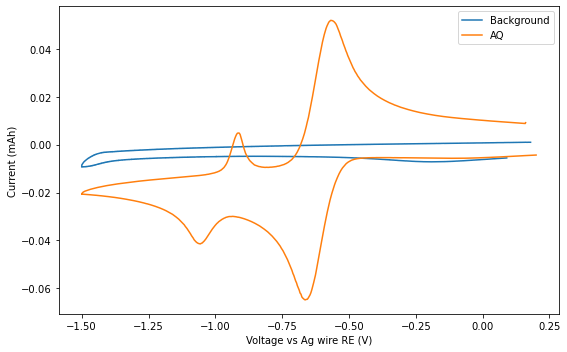

In [36]:
label = ['Background', 'AQ']  
plt.figure(figsize=(8, 5))

for df, name in zip([df_background, df_AQ_AgRE], label):
    plt.plot(df.iloc[:, 0], df.iloc[:, 1], label=name)

plt.xlabel("Voltage vs Ag wire RE (V)")
plt.ylabel("Current (mAh)")
plt.legend()
plt.tight_layout()
plt.show()

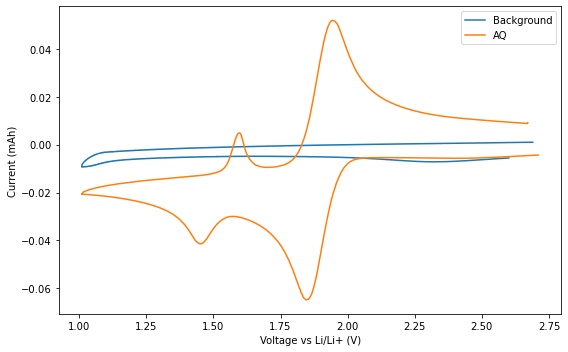

In [41]:
label = ['Background', 'AQ']  
plt.figure(figsize=(8, 5))

for df, name in zip([df_background_shifted, df_AQ_LiRE], label):
    plt.plot(df.iloc[:, 0], df.iloc[:, 1], label=name)

plt.xlabel("Voltage vs Li/Li+ (V)")
plt.ylabel("Current (mAh)")
plt.legend()
plt.tight_layout()
plt.show()